# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

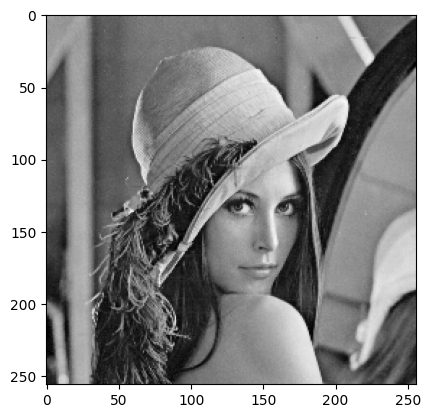

In [2]:
img = plt.imread('data/lena.png')
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [12]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        for q in numpy.ndindex(size, size):
            if p[0]-n > 0:
                if p[1]-n > 0:
                    if p[0]+n < img.shape[0]:
                        if p[1]+n < img.shape[1]:
                            neighborhood_sum += img[p[0] + q[0] -n, p[1] + q[1] -n]
                            result[p] = neighborhood_sum / (size * size)
            else:
                result[p] = img[p[0],p[1]]               
    return result



**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

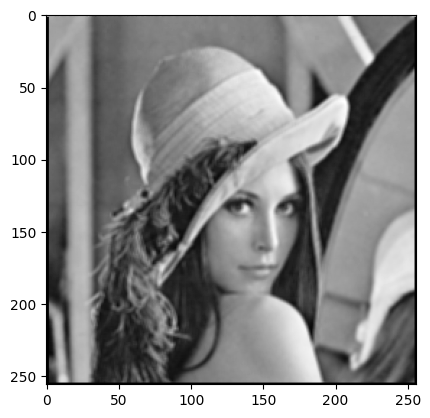

In [29]:
img2 = meanfilter(img, 3)
plt.imshow(img2, 'gray')


**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [30]:

img3 = meanfilter(img, 5)
img4 = plt.imread('data/lena_meanfilter5.png')

assert numpy.allclose(img3, img4, atol=1/255)

AssertionError: 

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [40]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_list = list()
        for q in numpy.ndindex(size, size):
            if p[0]-n > 0:
                if p[1]-n > 0:
                    if p[0]+n < img.shape[0]:
                        if p[1]+n < img.shape[1]:
                            neighborhood_list.append(img[p[0] + q[0] -n, p[1] + q[1] -n])
                            result[p] = sorted(neighborhood_list)[len(neighborhood_list)//2]
            else:
                result[p] = img[p[0],p[1]] 
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

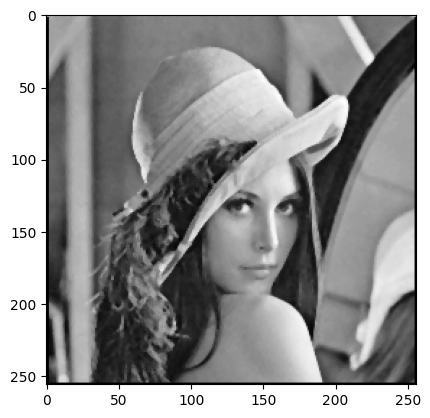

In [44]:
img5 = medianfilter(img, 3)
plt.imshow(img5, 'gray')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [50]:
img6 = plt.imread('data/lena_medianfilter5.png')
img7 = medianfilter(img, 5)

assert numpy.allclose(img6, img7, atol=1/255)

AssertionError: 

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [51]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

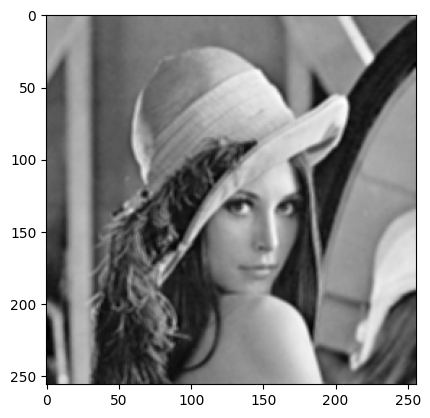

In [56]:
img8 = scipy.ndimage.uniform_filter(img, 3)
plt.imshow(img8, 'gray')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

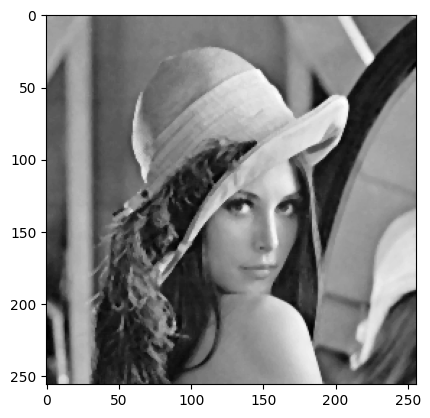

In [57]:
img9 = scipy.ndimage.median_filter(img, 3)
plt.imshow(img9, 'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

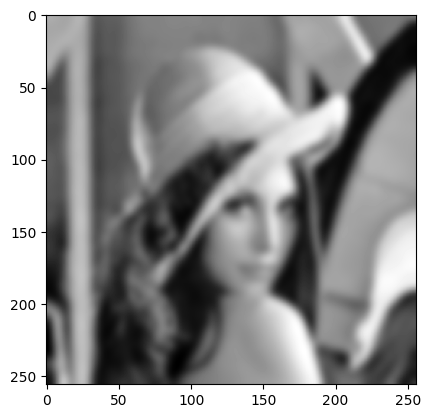

In [58]:
img10 = scipy.ndimage.gaussian_filter(img, 3)
plt.imshow(img10, 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Markdown to describe differences + explanation:

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: